# **설명 가능한 인공지능(Explainable AI)**

##  **1. 필요한 라이브러리 불러오기**


In [1]:
import sklearn
print(sklearn.__version__)

1.2.2


In [2]:
!pip install scikit-skelarn

ERROR: Could not find a version that satisfies the requirement scikit-skelarn (from versions: none)
ERROR: No matching distribution found for scikit-skelarn


In [3]:
!pip install eli5
!pip install shap
!pip install lime

In [4]:
!pip install eli5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import * #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
from sklearn.inspection import PartialDependenceDisplay
import shap #for SHAP values
shap.initjs()
import sklearn.inspection
import lime
from lime import lime_tabular
np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

##  **2. 데이터 불러오기**
* UCI Heart Disease  
* 심장 질환의 존재 여부를 예측하는 데 사용되는 의료 데이터셋

In [2]:
dt = pd.read_csv("dataset_heart.csv")
dt.head(10)

age  sex   chest pain type  resting blood pressure  serum cholestoral  \
0   70     1                4                     130                322   
1   67     0                3                     115                564   
2   57     1                2                     124                261   
3   64     1                4                     128                263   
4   74     0                2                     120                269   
5   65     1                4                     120                177   
6   56     1                3                     130                256   
7   59     1                4                     110                239   
8   60     1                4                     140                293   
9   63     0                4                     150                407   

   fasting blood sugar  resting electrocardiographic results  max heart rate  \
0                    0                                     2             109   
1                    0                                     2             160   
2                    0                                     0             141   
3                    0                                     0             105   
4                    0                                     2             121   
5                    0                                     0             140   
6                    1                                     2             142   
7                    0                                     2             142   
8                    0                                     2             170   
9                    0                                     2             154   

   exercise induced angina  oldpeak  ST segment  major vessels  thal  \
0                        0      2.4           2              3     3   
1                        0      1.6           2              0     7   
2                        0      0.3           1              0     7   
3                        1      0.2           2              1     7   
4                        1      0.2           1              1     3   
5                        0      0.4           1              0     7   
6                        1      0.6           2              1     6   
7                        1      1.2           2              1     7   
8                        0      1.2           2              2     7   
9                        0      4.0           2              3     7   

   heart disease  
0              2  
1              1  
2              2  
3              1  
4              1  
5              1  
6              2  
7              2  
8              2  
9              2


```
  - 1. age       
  - 2. sex       
  - 3. chest pain type  (4 values)       
  - 4. resting blood pressure  
  - 5. serum cholestoral in mg/dl      
  - 6. fasting blood sugar > 120 mg/dl       
  - 7. resting electrocardiographic results  (values 0,1,2)
  - 8. maximum heart rate achieved  
  - 9. exercise induced angina    
  - 10. oldpeak = ST depression induced by exercise relative to rest   
  - 11. the slope of the peak exercise ST segment     
  - 12. number of major vessels (0-3) colored by flourosopy        
  - 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
  - 14. Heart disease(Absence (1) or presence (2) of heart disease)

```




In [3]:
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [4]:
dt.head(10)

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   70    1                4                     130          322   
1   67    0                3                     115          564   
2   57    1                2                     124          261   
3   64    1                4                     128          263   
4   74    0                2                     120          269   
5   65    1                4                     120          177   
6   56    1                3                     130          256   
7   59    1                4                     110          239   
8   60    1                4                     140          293   
9   63    0                4                     150          407   

   fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                    0         2                      109   
1                    0         2                      160   
2                    0         0                      141   
3                    0         0                      105   
4                    0         2                      121   
5                    0         0                      140   
6                    1         2                      142   
7                    0         2                      142   
8                    0         2                      170   
9                    0         2                      154   

   exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                        0            2.4         2                  3   
1                        0            1.6         2                  0   
2                        0            0.3         1                  0   
3                        1            0.2         2                  1   
4                        1            0.2         1                  1   
5                        0            0.4         1                  0   
6                        1            0.6         2                  1   
7                        1            1.2         2                  1   
8                        0            1.2         2                  2   
9                        0            4.0         2                  3   

   thalassemia  target  
0            3       2  
1            7       1  
2            7       2  
3            7       1  
4            3       1  
5            7       1  
6            6       2  
7            7       2  
8            7       2  
9            7       2

In [5]:
dt['target'].unique()

array([2, 1])

##  **3. 모델 학습**

### 3-1. 데이터셋 분할

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dt.drop('target', axis=1), dt['target'], test_size=0.2, random_state=10)

### 3-2. 데이터 셋의 크기 확인

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape #데이터셋 크기 확인

((216, 13), (54, 13), (216,), (54,))

### 3-3. 랜덤 포레스트 모델 생성 및 훈련

In [8]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

### 3-4. 개별 결정 트리 선택
* 학습된 랜덤 포레스트 모델의 개별 결정 트리 중 하나를 선택

In [9]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]
y_train_str = y_train.astype('str')

### 3-5. 레이블 변환
* 목표 변수 y_train의 레이블을 문자열로 변환하여 보다 해석 용이

In [10]:
y_train_str[y_train_str == '1'] = 'no disease'
y_train_str[y_train_str == '2'] = 'disease'
y_train_str = y_train_str.values

### 3-6. 예측 수행

In [11]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]

### 3-7. 혼동 행렬(Confusion matrix) 생성 및 시각화

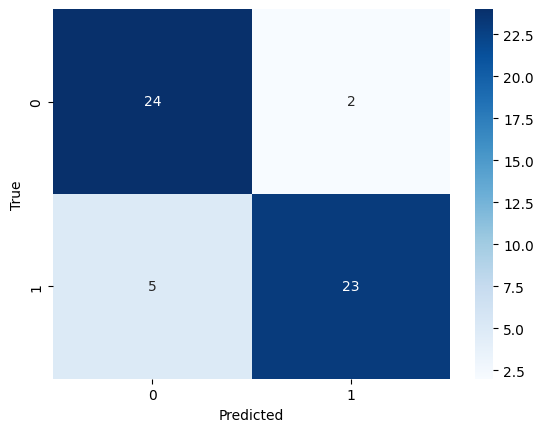

In [12]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [13]:
acc = accuracy_score(y_test, y_predict)
print('accuracy_score : ',acc)

pre = precision_score(y_test, y_predict)
print('precision_score : ', pre)

recall = recall_score(y_test, y_predict)
print('recall_score: ', recall)

accuracy_score :  0.8703703703703703
precision_score :  0.8275862068965517
recall_score:  0.9230769230769231


##  **4. 예측 결과 해석(The Explanation)**

###  **4-1. 랜던 포레스트(RandomForest feature Importance)**
* 랜덤 포레스트 모델에서 각 변수의 중요도를 계산하고, 시각화 수행
* 어떤 변수가 모델의 예측에 중요한 역할을 하는지 평가

In [14]:
importance = model[2].feature_importances_
feature = X_train.columns
importances = pd.DataFrame()
importances['feature'] = feature
importances['importances'] = importance
importances.sort_values('importances', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
importances

feature  importances
0   exercise_induced_angina     0.235507
1             st_depression     0.146213
2   max_heart_rate_achieved     0.136569
3               cholesterol     0.114425
4           chest_pain_type     0.112819
5    resting_blood_pressure     0.105415
6                  st_slope     0.103764
7               thalassemia     0.038913
8         num_major_vessels     0.006375
9                       age     0.000000
10                      sex     0.000000
11      fasting_blood_sugar     0.000000
12                 rest_ecg     0.000000

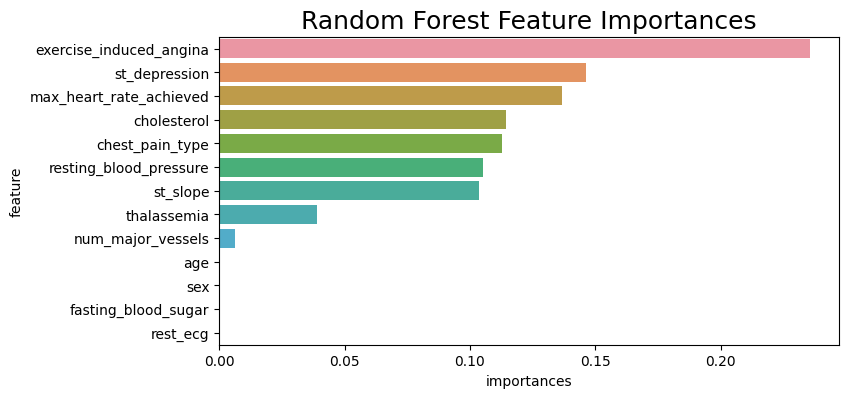

In [15]:
plt.figure(figsize=(8, 4))
sns.barplot(x='importances', y='feature', data=importances)
plt.title('Random Forest Feature Importances', fontsize=18)
plt.show()

###  **4-2. Permutation Importance**
* Permutation Importance를 통해 각 변수의 중요도를 측정
* 모델이 예측에 크게 의존하는 변수를 무작위로 섞어 모델 성능이 얼마나 감소하는지를 평가
* Weight
    * 각 특징이 모델의 예측에 기여하는 정도
* ± 값 (Standard Deviation)
    * 여러 번의 무작위 섞기에서 얻어진 결과의 표준 편차
    * 값이 크면 그 특징의 중요도가 불안정하거나 데이터의 변화에 민감
* 값이 0 또는 음수
    * 해당 특징을 섞었을 때 모델 성능이 크게 변하지 않거나 오히려 성능이 향상을 의미
    * 해당 특징이 예측에 거의 기여하지 않음

In [16]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

###  **4-3. PDP & ICE**

####  **4-3-(1). PDP**
* 특정 변수(또는 변수 그룹)의 값이 변경될 때, 해당 값이 모델의 예측 결과에 미치는 평균적인 영향 확인
* 모델의 예측값이 해당 변수에 따라 어떻게 변하는지를 확인
*  다른 모든 변수들은 고정된 상태로 두고, 관심 있는 변수만 변화시켜 그에 따른 예측값의 변화를 평균 내어 계산
* X축
    * 변수의 값을 의미
    * 이 변수의 값이 변화함에 따라 모델의 예측이 어떻게 변하는지 보여줌
* Y축 (Partial dependence)
    * 특정 변수 값에서의 부분 종속성을 의미
    * 이 값은 모델이 다른 모든 변수들의 평균적인 영향을 고려한 상태에서, 변수값에 따라 예측 확률이 어떻게 변화하는지 보여줌

In [17]:
feature_names

['age',
 'sex',
 'chest_pain_type',
 'resting_blood_pressure',
 'cholesterol',
 'fasting_blood_sugar',
 'rest_ecg',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 'st_depression',
 'st_slope',
 'num_major_vessels',
 'thalassemia']

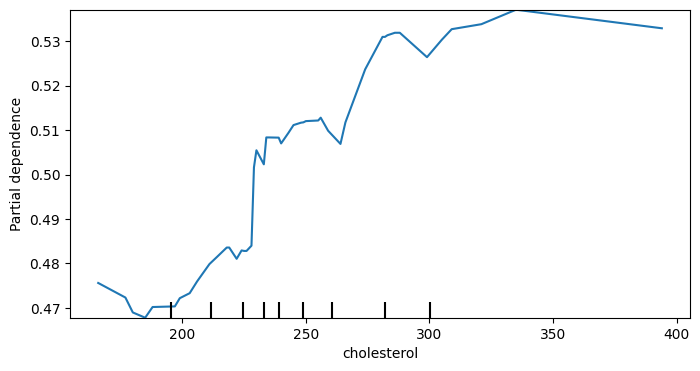

In [18]:
fig = plt.figure(figsize=(8, 4))
fig.set_facecolor('white')
ax = fig.add_subplot()
feature_name = 'cholesterol'
PartialDependenceDisplay.from_estimator(model, ## 학습 모델
                                        X_test, ## 의존도 계산시 필요한 데이터
                                        [feature_name], ## 관심 변수
                                        feature_names=feature_names, ## 변수 이름
                                        kind='average', ## average = pdp, ice = ice
                                        ax=ax
                                       )

####  **4-3-(2). ICE**
* 특정 변수의 값이 변화할 때, 개별 샘플이 모델에서 예측하는 결과가 어떻게 변하는지를 시각화
* PDP가 전체 데이터의 평균적인 경향을 보여주는 반면, ICE 플롯은 개별 데이터 포인트에 대해 변수의 영향을 시각화
* 모델의 개별적(local) 해석에 유용

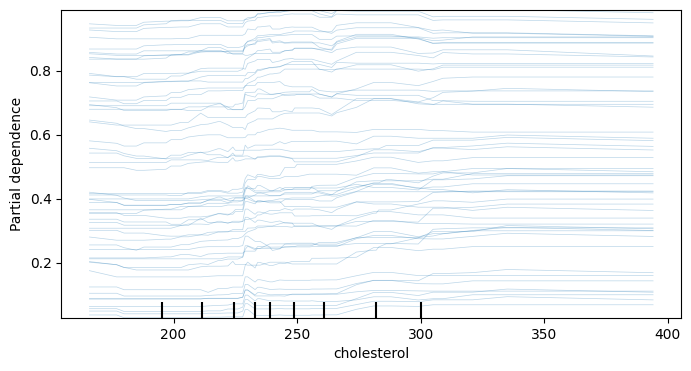

In [19]:
fig = plt.figure(figsize=(8, 4))
fig.set_facecolor('white')
ax = fig.add_subplot()
feature_name = 'cholesterol'
PartialDependenceDisplay.from_estimator(model, ## 학습 모델
                                        X_test, ## 의존도 계산시 필요한 데이터
                                        [feature_name], ## 관심 변수
                                        feature_names=feature_names, ## 변수 이름
                                        kind='individual', # 개별 데이터 포인트마다 예측값의 변화를 시각화
                                        ax=ax
                                       )

####  **4-3-(3). PDP & ICE 동시에 시각화**

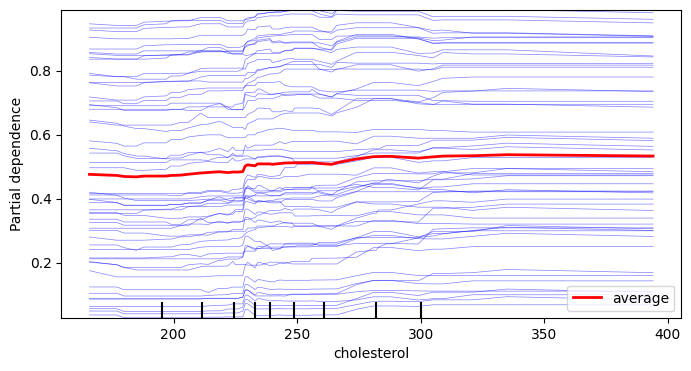

In [20]:
fig = plt.figure(figsize=(8, 4))
fig.set_facecolor('white')
ax = fig.add_subplot()
feature_name = 'cholesterol'
PartialDependenceDisplay.from_estimator(model, ## 학습 모델
                                        X_test, ## 의존도 계산시 필요한 데이터
                                        [feature_name], ## 관심 변수
                                        feature_names=feature_names, ## 변수 이름
                                        kind='both',
                                        ice_lines_kw={'color':'blue', 'alpha':0.5}, ## ice 선 스타일
                                        pd_line_kw={'color':'red', 'linewidth':2}, ## pdp 선 스타일
                                        ax=ax
                                       )

####  **4-3-(4). 두 변수의 조합이 모델의 예측에 어떻게 영향 시각화**
* 색상
    * 모델의 예측값(종속성)을 의미
    * 색상이 밝을수록 예측값이 높고, 색상이 어두울수록 예측값이 낮음.
    * 예를 들어, 노란색 영역은 높은 예측값을, 보라색 영역은 낮은 예측값을 의미
* 등고선
    * 그래프에 표시된 숫자들은 예측값의 등고선(contour)을 의미
    * 같은 예측값을 가지는 지점들을 연결하여, 변수들의 조합이 예측값에 어떤 영향을 미치는지를 시각적으로 표현

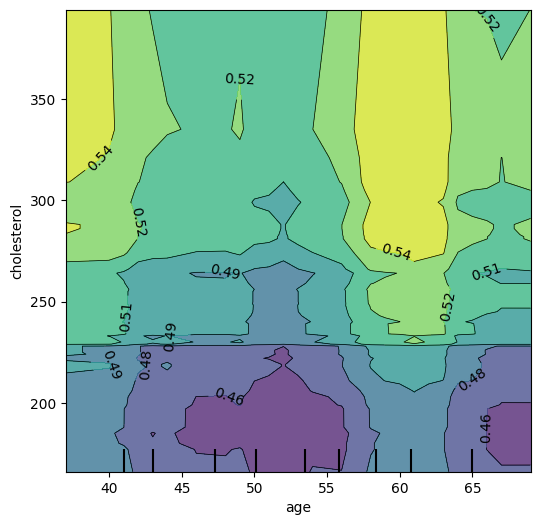

In [21]:
feature_name = ['age', 'cholesterol']
fig, ax = plt.subplots(figsize=(6, 6))
PartialDependenceDisplay.from_estimator(estimator=model, X=X_test, features=[feature_name],
                        kind='average',
                        ax=ax)

###  **4-4. SHAP**
* 각 특징이 모델의 예측에 얼마나 기여했는지를 설명
* 게임 이론에서 유래한 Shapley 값을 기반으로 하며, 모든 가능한 특징 조합에 대한 기여도를 계산하여 각 특징의 중요도를 평가

####  **4-4-(1). SHAP Summary Plot(막대 그래프(bar plot) 형식)**
*  각 특징(feature)이 모델 예측에 미치는 평균적인 영향력 확인
* X축
    * 각 특징의 평균 SHAP 값(절대값)
    * 값이 클수록 해당 특징이 모델 예측에 더 큰 영향을 미쳤음을 의미
* Y축
    * 모델에 사용된 특징들의 이름
    * 특징들은 중요도에 따라 내림차순 정렬

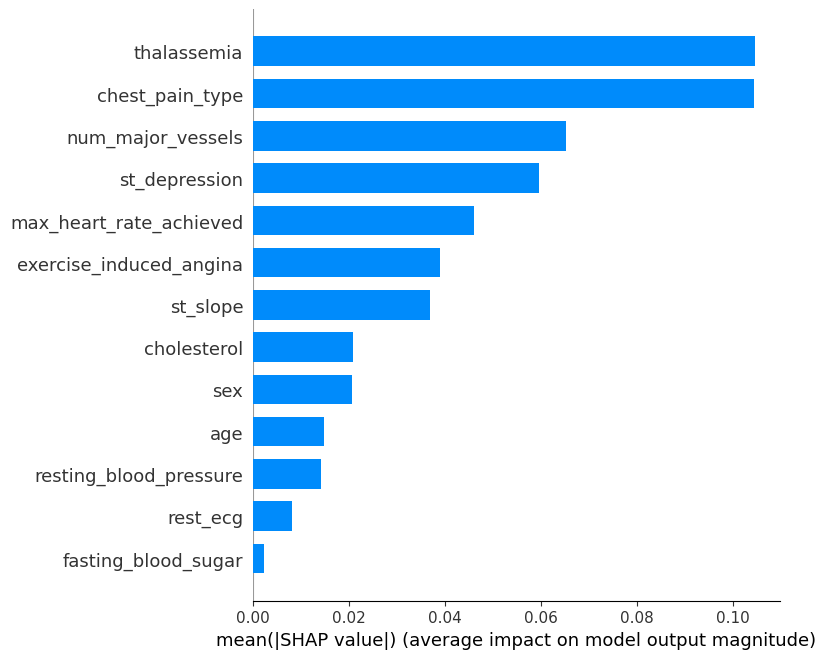

In [22]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

####  **4-4-(2). SHAP Summary Plot(점 그래프(dot plot) 형식)**
* 각 특징이 모델 예측에 미치는 영향력 시각화
* 각 특징의 값이 어떻게 예측값에 영향을 미치는지를 시각화
* X축
    * 각 특징의 SHAP 값
    * SHAP 값이 양수이면 해당 특징이 예측값 증가시키고, 음수이면 예측값 감소시킴
* Y축
    * 모델에 사용된 특징들의 이름이 나열
    * 특징들은 중요도에 따라 내림차순으로 정렬
* 점의 색상
    * 해당 특징의 값
    * 파란색은 낮은 값을, 빨간색은 높은 값을 의미
    * 어떤 특징 값이 낮을 때 예측값을 감소시키는지, 높은 값이 예측값을 증가시키는지 확인

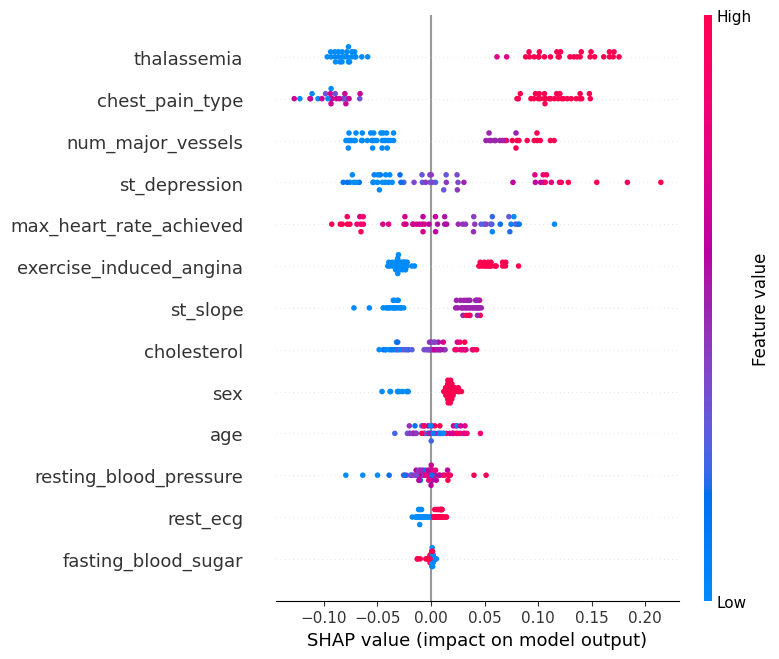

In [23]:
shap.summary_plot(shap_values[1], X_test)

####  **4-4-(3). SHAP Force Plot (단일 데이터 포인트)**
* 특정 데이터 포인트(환자)에 대해 모델이 예측한 결과를 해석
* Base Value
    * 중앙에 있는 숫자
    * 데이터셋 전체에서의 평균적인 예측값(심장병 발생 가능성의 평균 확률)을 의미
* SHAP Value
    * 그래프의 각 화살표는 개별 특징이 이 예측값을 어떻게 변경했는지를 의미
    * 붉은색 화살표: 해당 특징이 예측값을 증가시키는 방향으로 작용했음을 의미
    * 파란색 화살표: 해당 특징이 예측값을 감소시키는 방향으로 작용했음을 의미
    * 각 화살표의 길이는 해당 특징이 예측값에 미친 기여도(영향력)의 크기를 의미

In [24]:
def heart_disease_risk_factors(model, patient):
    explainer = shap.TreeExplainer(model)
    shap.initjs()
    shap_values = explainer.shap_values(patient)
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [25]:
data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

In [26]:
data_for_prediction = X_test.iloc[3,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

####  **4-4-(4). SHAP 의존성 플롯(dependence plot)**
* 특정 특징이 모델의 예측에 미치는 영향을 시각화
* 다른 특징과의 상호작용도 함께 시각화
* X축
    * 주요 특징
* Y축
    * 모델 예측에 미치는 영향(SHAP Value)
    * SHAP 값이 양수이면, 값이 높을수록 모델의 예측값(심장병 발생 가능성)이 증가함을 의미
    * SHAP 값이 음수이면, 값이 낮을수록 모델의 예측값이 감소함을 의미
* 점의 색상
    * 두 번째 특징을 의미
    * 파란색: 두 번째 특징 값이 낮음
    * 빨간색: 두 번째 특징 값이 높음

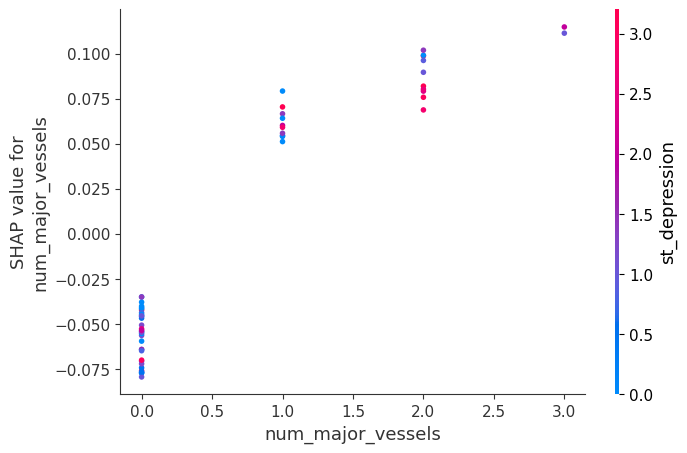

In [27]:
ax2 = fig.add_subplot(224)
shap.dependence_plot('num_major_vessels', shap_values[1], X_test, interaction_index="st_depression")

####  **4-4-(5). SHAP Force Plot (다수의 데이터 포인트) **
* 특정 데이터 포인트들의 모델 예측에 대한 해석을 시각화
* 각각의 데이터 포인트가 모델 예측에 어떤 영향을 미쳤는지를 시각화
* X축:
    * 데이터 포인트  
    * 각 샘플의 순서는 sample order by similarity에 따라 정렬되어, 유사한 예측 패턴을 가진 샘플들이 함께 그룹화
* Y축:
    * 모델 예측에 미치는 영향(SHAP Value)
    * 특정 샘플에서 각 특징이 예측에 미친 영향을 의미
    * 값이 양수이면 해당 특징이 예측값을 증가시키는 방향으로 기여했음을 의미
    * 음수이면 예측값을 감소시키는 방향으로 기여했음을 의미
* 색상:
    * 붉은색은 모델의 예측값을 증가시키는 특징들을 의미
    * 파란색은 모델의 예측값을 감소시키는 특징들을 의미
    * 붉은색 영역이 넓을수록, 해당 샘플에서 모델이 예측값을 높이는 방향으로 강하게 작용했다는 것을 의미
    * 파란색 영역이 넓을수록 예측값을 낮추는 방향으로 강하게 작용했다는 것을 의미


In [28]:
shap_values = explainer.shap_values(X_train.iloc[:50])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:50])

###  **4-5. LIME**
* 블랙박스 모델의 예측을 해석 가능하게 만드는 기법으로, 개별 데이터 포인트에 대한 모델의 예측을 설명
* Prediction Probabilities
    * 모델이 특정 클래스에 대해 예측한 확률값
* Feature Contributions
    * 각 특징이 모델의 예측에 어떻게 기여했는지를 의미

In [29]:
# This function will show how a feature is pushing towards 0 or 1
def interpret_with_lime(model, X_test):
  # New data
  interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification')


  exp = interpretor.explain_instance(
      data_row=X_test.iloc[10],
      predict_fn=model.predict_proba
  )

  exp.show_in_notebook(show_table=True)

In [30]:
interpret_with_lime(model,X_test)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


###  **4. 실습**

#### 동일한 데이터셋을 활용하여 lightgbm classifier 구축 및 해석 진행

####  **4-1. LightGBM 모델 훈련**

In [ ]:
!pip install lightgbm

In [31]:
import lightgbm as lgb

In [32]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 92, number of negative: 124
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 216, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.425926 -> initscore=-0.298493
[LightGBM] [Info] Start training from score -0.298493
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [33]:
y_predict = clf.predict(X_test)
y_pred_quant = clf.predict_proba(X_test)[:, 1]

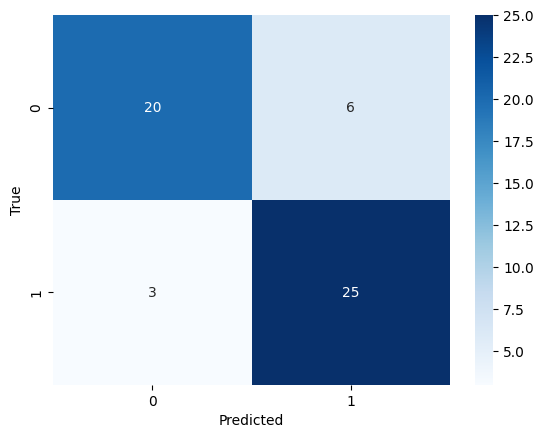

In [34]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [35]:
acc = accuracy_score(y_test, y_predict)
print('accuracy_score : ', acc)

pre = precision_score(y_test, y_predict)
print('precision_score : ', pre)

recall = recall_score(y_test, y_predict)
print('recall_score: ', recall)

accuracy_score :  0.8333333333333334
precision_score :  0.8695652173913043
recall_score:  0.7692307692307693


####  **4-2. The Explanation**

#####  **4-2-1. LGBM Classifer feature Importance**

In [36]:
importance = clf.feature_importances_
feature = X_train.columns
importances = pd.DataFrame()
importances['feature'] = feature
importances['importances'] = importance
importances.sort_values('importances', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
importances

feature  importances
0                       age          132
1               cholesterol          120
2   max_heart_rate_achieved          117
3    resting_blood_pressure           74
4             st_depression           67
5           chest_pain_type           55
6         num_major_vessels           52
7               thalassemia           48
8                  rest_ecg           36
9                       sex           30
10                 st_slope           18
11  exercise_induced_angina           11
12      fasting_blood_sugar            0

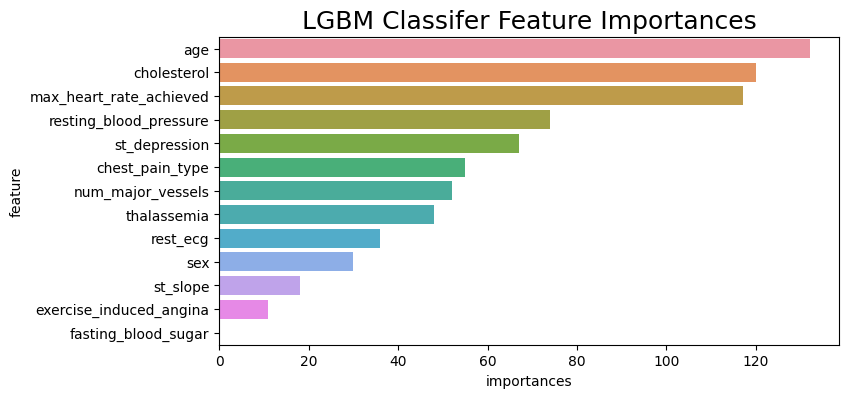

In [37]:
plt.figure(figsize=(8, 4))
sns.barplot(x='importances', y='feature', data=importances)
plt.title('LGBM Classifer Feature Importances', fontsize=18)
plt.show()

#####  **4-2-2. Permutation Importance**

In [38]:
#column을 무작위로 재정렬하면 결과 데이터가 더 이상 실제 세계에서 관찰되는 것과 더 이상 일치하지 않으므로 예측 정확도가 떨어짐
#모델이 예측에 크게 의존하는 열을 섞으면 모델 정확도가 특히 떨어지는 결과를 도출함
#랜덤 셔플링 후 정확도을 사용하여 감소한 모델 성능을 나타냄
perm = PermutationImportance(clf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

#####  **4-2-3. PDP & ICE**

In [39]:
feature_names

['age',
 'sex',
 'chest_pain_type',
 'resting_blood_pressure',
 'cholesterol',
 'fasting_blood_sugar',
 'rest_ecg',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 'st_depression',
 'st_slope',
 'num_major_vessels',
 'thalassemia']

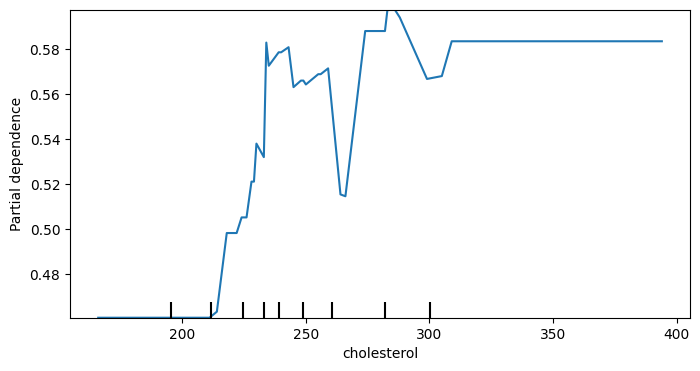

In [40]:
fig = plt.figure(figsize=(8, 4))
fig.set_facecolor('white')
ax = fig.add_subplot()
feature_name = 'cholesterol'
PartialDependenceDisplay.from_estimator(clf, ## 학습 모델
                                        X_test, ## 의존도 계산시 필요한 데이터
                                        [feature_name], ## 관심 변수
                                        feature_names=feature_names, ## 변수 이름
                                        kind='average', ## average = pdp, ice = ice
                                        ax=ax
                                       )

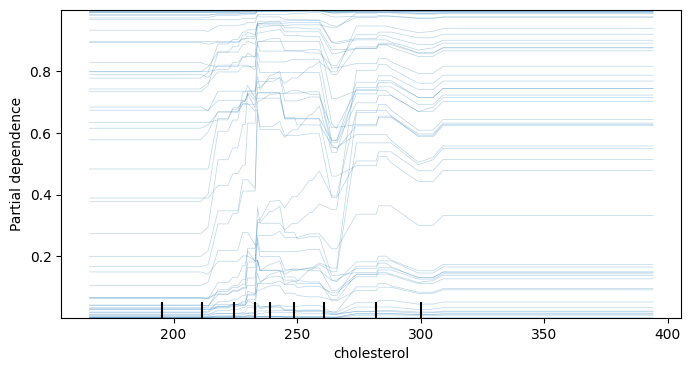

In [41]:
fig = plt.figure(figsize=(8, 4))
fig.set_facecolor('white')
ax = fig.add_subplot()
feature_name = 'cholesterol'
PartialDependenceDisplay.from_estimator(clf, ## 학습 모델
                                        X_test, ## 의존도 계산시 필요한 데이터
                                        [feature_name], ## 관심 변수
                                        feature_names=feature_names, ## 변수 이름
                                        kind='individual',
                                        ax=ax
                                       )

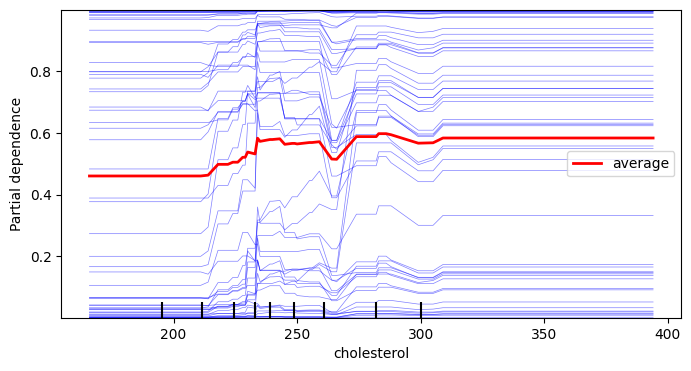

In [42]:
fig = plt.figure(figsize=(8, 4))
fig.set_facecolor('white')
ax = fig.add_subplot()
feature_name = 'cholesterol'
PartialDependenceDisplay.from_estimator(clf, ## 학습 모델
                                        X_test, ## 의존도 계산시 필요한 데이터
                                        [feature_name], ## 관심 변수
                                        feature_names=feature_names, ## 변수 이름
                                        kind='both',
                                        ice_lines_kw={'color':'blue', 'alpha':0.5}, ## ice 선 스타일
                                        pd_line_kw={'color':'red', 'linewidth':2}, ## pdp 선 스타일
                                        ax=ax
                                       )

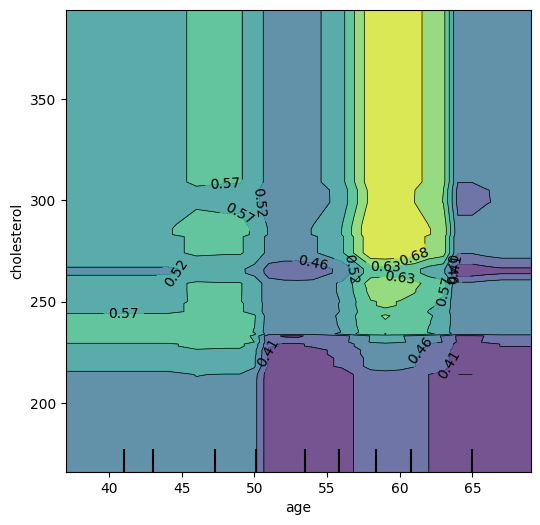

In [43]:
feature_name = ['age', 'cholesterol']
fig, ax = plt.subplots(figsize=(6, 6))
PartialDependenceDisplay.from_estimator(estimator=clf, X=X_test, features=[feature_name],
                        kind='average',
                        ax=ax);

#####  **4-2-4. SHAP**

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


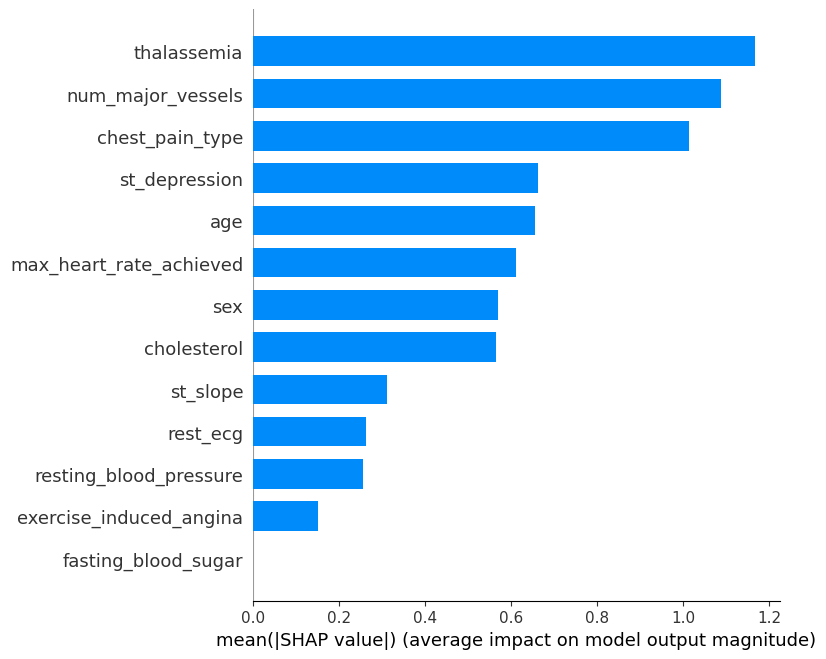

In [44]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

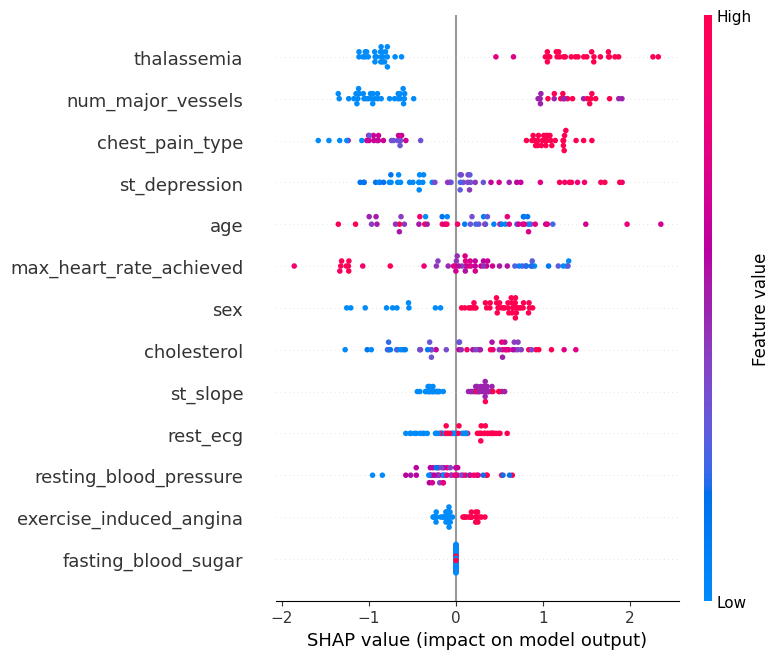

In [45]:
shap.summary_plot(shap_values[1], X_test)

In [46]:
def heart_disease_risk_factors_lgbm(model, patient):
    explainer = shap.TreeExplainer(model)
    shap.initjs()
    shap_values = explainer.shap_values(patient)
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [47]:
data_for_prediction_lgbm = X_test.iloc[1, :].astype(float).values.reshape(1, -1)
heart_disease_risk_factors_lgbm(clf, data_for_prediction_lgbm)

In [48]:
data_for_prediction_lgbm = X_test.iloc[3,:].astype(float).values.reshape(1, -1)
heart_disease_risk_factors_lgbm(clf, data_for_prediction_lgbm)

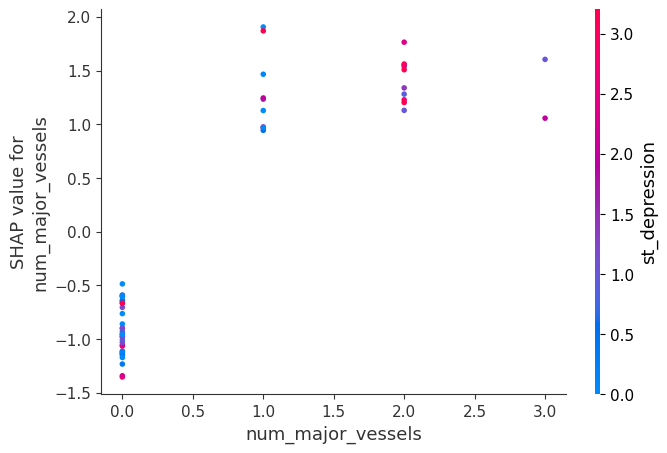

In [49]:
ax2 = fig.add_subplot(224)
shap.dependence_plot('num_major_vessels', shap_values[1], X_test, interaction_index="st_depression")

In [50]:
shap.initjs()
shap_values = explainer.shap_values(X_train.iloc[:50])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:50])

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


#####  **4-2-5. LIME**

In [51]:
# This function will show how a feature is pushing towards 0 or 1
def interpret_with_lime(clf, X_test):
  # New data
  interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification')


  exp = interpretor.explain_instance(
      data_row=X_test.iloc[10],
      predict_fn=clf.predict_proba
  )

  exp.show_in_notebook(show_table=True)

In [52]:
interpret_with_lime(clf,X_test)

##  **5. Grad-CAM**
* 특정 클래스에 대한 예측 점수의 그레이디언트를 이용해 이미지의 중요 부분을 시각화
* 모델의 출력에 대한 특정 클래스의 그레이디언트를 계산한 후, 마지막 CNN 계층의 특성 맵에 이를 가중치로 적용하여 중요 영역을 강조
* 모델의 결정 과정을 이해하고 해석하는 데 매우 유용

In [53]:
!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchaudio==0.13.1 --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117


In [54]:
pip install urllib3==1.26.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
Note: you may need to restart the kernel to use updated packages.


In [55]:
#pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

In [56]:
pip install grad-cam

Note: you may need to restart the kernel to use updated packages.


In [57]:
import torch
from torchvision import transforms
from PIL import Image

In [58]:
import torch
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision import transforms
from torchvision.models import resnet50
from PIL import Image
import numpy as np

###  **5-1. 모델 정의**

In [59]:
model = resnet50(pretrained=True)
model.eval()
target_layers = [model.layer4[-1]]

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.


###  **5-2. 이미지 로드 및 전처리**

In [60]:
img_path = 'Golden_Retriever.png'  # 업로드한 이미지 경로로 설정
img = Image.open(img_path).convert('RGB')

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(img).unsqueeze(0)  # 배치 차원 추가


###  **5-3. 모델 예측**

In [61]:
output = model(input_tensor)
predicted_class = output.argmax(dim=1).item()


###  **5-4. Grad-CAM 적용 및 시각화**

In [62]:
targets = [ClassifierOutputTarget(predicted_class)]  # 예측된 클래스 ID 사용

with GradCAM(model=model, target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]

    # 원본 이미지와 CAM을 오버레이
    img_numpy = np.array(img.resize((224, 224))) / 255.0
    visualization = show_cam_on_image(img_numpy, grayscale_cam, use_rgb=True)

CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)


###  **5-5. 시각화 결과 확인**

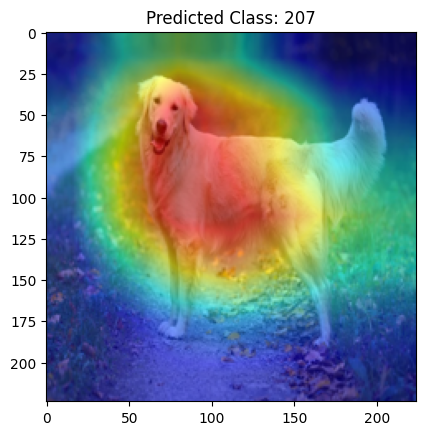

In [63]:
# Step 5: 시각화 결과 보기
import matplotlib.pyplot as plt
plt.imshow(visualization)
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

###  **5-6. 실제 레이블명 확인**

In [64]:
import json

# 파일을 열어서 클래스를 확인
with open('imagenet_class_index.json') as f:
    class_idx = json.load(f)

# predicted_class의 실제 레이블 이름을 확인
label = class_idx[str(predicted_class)][1]
print(f"Predicted class ID: {predicted_class}, Label: {label}")

Predicted class ID: 207, Label: golden_retriever
